a  a    1.000000
   b   -0.001565
   c    0.081567
   d   -0.044468
   e   -0.180971
   f    0.037975
   g   -0.171486
   h    0.164785
   i   -0.016911
   j   -0.008320
b  a   -0.001565
   b    1.000000
   c    0.003356
   d   -0.038864
   e    0.018345
   f   -0.077456
   g   -0.048556
   h   -0.019027
   i   -0.066817
   j   -0.077384
c  a    0.081567
   b    0.003356
   c    1.000000
   d   -0.088791
   e    0.089427
   f    0.022607
   g   -0.077489
   h    0.053261
   i   -0.128778
   j    0.044406
          ...   
h  a    0.164785
   b   -0.019027
   c    0.053261
   d    0.069965
   e   -0.066692
   f    0.096778
   g   -0.012596
   h    1.000000
   i   -0.109997
   j    0.039635
i  a   -0.016911
   b   -0.066817
   c   -0.128778
   d    0.220592
   e    0.008202
   f    0.083601
   g   -0.144128
   h   -0.109997
   i    1.000000
   j   -0.078852
j  a   -0.008320
   b   -0.077384
   c    0.044406
   d   -0.015171
   e   -0.007127
   f    0.032234
   g    0.039635
   h    0.0396

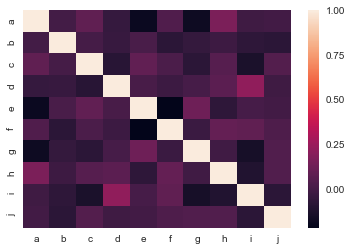

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

data = np.random.rand(100,10)

df = pd.DataFrame(data)
df.columns = list('abcdefghij')

corrMatrix = df.corr()



print corrMatrix.unstack()

sns.heatmap(corrMatrix)

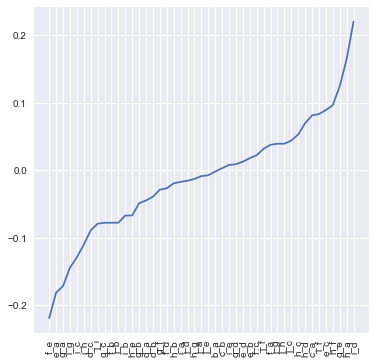

In [16]:
no_dups = corrMatrix.mask(np.tril(np.ones(corrMatrix.shape)).astype(np.bool)).unstack().sort_values().dropna()

# print no_dups

xlabels = ['_'.join(x) for x in no_dups.index.values]


no_dups.plot(figsize=(6,6))
plt.xticks(range(len(xlabels)),xlabels, rotation=90)
plt.show()

In [17]:
print corrMatrix.unstack()[0]

1.0


In [18]:
print corrMatrix.unstack()[['a','b']]

a  a    1.000000
   b   -0.001565
   c    0.081567
   d   -0.044468
   e   -0.180971
   f    0.037975
   g   -0.171486
   h    0.164785
   i   -0.016911
   j   -0.008320
b  a   -0.001565
   b    1.000000
   c    0.003356
   d   -0.038864
   e    0.018345
   f   -0.077456
   g   -0.048556
   h   -0.019027
   i   -0.066817
   j   -0.077384
dtype: float64


In [19]:
print corrMatrix.unstack()['a','b']

-0.0015653513803843577


In [20]:
print corrMatrix.unstack().index.values

[('a', 'a') ('a', 'b') ('a', 'c') ('a', 'd') ('a', 'e') ('a', 'f')
 ('a', 'g') ('a', 'h') ('a', 'i') ('a', 'j') ('b', 'a') ('b', 'b')
 ('b', 'c') ('b', 'd') ('b', 'e') ('b', 'f') ('b', 'g') ('b', 'h')
 ('b', 'i') ('b', 'j') ('c', 'a') ('c', 'b') ('c', 'c') ('c', 'd')
 ('c', 'e') ('c', 'f') ('c', 'g') ('c', 'h') ('c', 'i') ('c', 'j')
 ('d', 'a') ('d', 'b') ('d', 'c') ('d', 'd') ('d', 'e') ('d', 'f')
 ('d', 'g') ('d', 'h') ('d', 'i') ('d', 'j') ('e', 'a') ('e', 'b')
 ('e', 'c') ('e', 'd') ('e', 'e') ('e', 'f') ('e', 'g') ('e', 'h')
 ('e', 'i') ('e', 'j') ('f', 'a') ('f', 'b') ('f', 'c') ('f', 'd')
 ('f', 'e') ('f', 'f') ('f', 'g') ('f', 'h') ('f', 'i') ('f', 'j')
 ('g', 'a') ('g', 'b') ('g', 'c') ('g', 'd') ('g', 'e') ('g', 'f')
 ('g', 'g') ('g', 'h') ('g', 'i') ('g', 'j') ('h', 'a') ('h', 'b')
 ('h', 'c') ('h', 'd') ('h', 'e') ('h', 'f') ('h', 'g') ('h', 'h')
 ('h', 'i') ('h', 'j') ('i', 'a') ('i', 'b') ('i', 'c') ('i', 'd')
 ('i', 'e') ('i', 'f') ('i', 'g') ('i', 'h') ('i', 'i') ('i', 

In [21]:
print corrMatrix.mask(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))

    a         b         c         d         e         f         g         h  \
a NaN -0.001565  0.081567 -0.044468 -0.180971  0.037975 -0.171486  0.164785   
b NaN       NaN  0.003356 -0.038864  0.018345 -0.077456 -0.048556 -0.019027   
c NaN       NaN       NaN -0.088791  0.089427  0.022607 -0.077489  0.053261   
d NaN       NaN       NaN       NaN  0.012971 -0.026360  0.009229  0.069965   
e NaN       NaN       NaN       NaN       NaN -0.218748  0.124689 -0.066692   
f NaN       NaN       NaN       NaN       NaN       NaN -0.028459  0.096778   
g NaN       NaN       NaN       NaN       NaN       NaN       NaN -0.012596   
h NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
i NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
j NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          i         j  
a -0.016911 -0.008320  
b -0.066817 -0.077384  
c -0.128778  0.044406  
d  0.220592 -0.015171  
e  0.00820

In [22]:
no_dups = corrMatrix.mask(np.tril(np.ones(corrMatrix.shape)).astype(np.bool)).unstack().dropna()

no_dups

b  a   -0.001565
c  a    0.081567
   b    0.003356
d  a   -0.044468
   b   -0.038864
   c   -0.088791
e  a   -0.180971
   b    0.018345
   c    0.089427
   d    0.012971
f  a    0.037975
   b   -0.077456
   c    0.022607
   d   -0.026360
   e   -0.218748
g  a   -0.171486
   b   -0.048556
   c   -0.077489
   d    0.009229
   e    0.124689
   f   -0.028459
h  a    0.164785
   b   -0.019027
   c    0.053261
   d    0.069965
   e   -0.066692
   f    0.096778
   g   -0.012596
i  a   -0.016911
   b   -0.066817
   c   -0.128778
   d    0.220592
   e    0.008202
   f    0.083601
   g   -0.144128
   h   -0.109997
j  a   -0.008320
   b   -0.077384
   c    0.044406
   d   -0.015171
   e   -0.007127
   f    0.032234
   g    0.039635
   h    0.039635
   i   -0.078852
dtype: float64

In [23]:
print no_dups

b  a   -0.001565
c  a    0.081567
   b    0.003356
d  a   -0.044468
   b   -0.038864
   c   -0.088791
e  a   -0.180971
   b    0.018345
   c    0.089427
   d    0.012971
f  a    0.037975
   b   -0.077456
   c    0.022607
   d   -0.026360
   e   -0.218748
g  a   -0.171486
   b   -0.048556
   c   -0.077489
   d    0.009229
   e    0.124689
   f   -0.028459
h  a    0.164785
   b   -0.019027
   c    0.053261
   d    0.069965
   e   -0.066692
   f    0.096778
   g   -0.012596
i  a   -0.016911
   b   -0.066817
   c   -0.128778
   d    0.220592
   e    0.008202
   f    0.083601
   g   -0.144128
   h   -0.109997
j  a   -0.008320
   b   -0.077384
   c    0.044406
   d   -0.015171
   e   -0.007127
   f    0.032234
   g    0.039635
   h    0.039635
   i   -0.078852
dtype: float64


In [24]:
bins = pd.cut(no_dups, bins=10)

bins

b  a    (-0.043, 0.000922]
c  a      (0.0449, 0.0888]
   b    (0.000922, 0.0449]
d  a     (-0.0869, -0.043]
   b    (-0.043, 0.000922]
   c     (-0.131, -0.0869]
e  a      (-0.219, -0.175]
   b    (0.000922, 0.0449]
   c       (0.0888, 0.133]
   d    (0.000922, 0.0449]
f  a    (0.000922, 0.0449]
   b     (-0.0869, -0.043]
   c    (0.000922, 0.0449]
   d    (-0.043, 0.000922]
   e      (-0.219, -0.175]
g  a      (-0.175, -0.131]
   b     (-0.0869, -0.043]
   c     (-0.0869, -0.043]
   d    (0.000922, 0.0449]
   e       (0.0888, 0.133]
   f    (-0.043, 0.000922]
h  a        (0.133, 0.177]
   b    (-0.043, 0.000922]
   c      (0.0449, 0.0888]
   d      (0.0449, 0.0888]
   e     (-0.0869, -0.043]
   f       (0.0888, 0.133]
   g    (-0.043, 0.000922]
i  a    (-0.043, 0.000922]
   b     (-0.0869, -0.043]
   c     (-0.131, -0.0869]
   d        (0.177, 0.221]
   e    (0.000922, 0.0449]
   f      (0.0449, 0.0888]
   g      (-0.175, -0.131]
   h     (-0.131, -0.0869]
j  a    (-0.043, 0.000922]
 

In [25]:
no_dups

b  a   -0.001565
c  a    0.081567
   b    0.003356
d  a   -0.044468
   b   -0.038864
   c   -0.088791
e  a   -0.180971
   b    0.018345
   c    0.089427
   d    0.012971
f  a    0.037975
   b   -0.077456
   c    0.022607
   d   -0.026360
   e   -0.218748
g  a   -0.171486
   b   -0.048556
   c   -0.077489
   d    0.009229
   e    0.124689
   f   -0.028459
h  a    0.164785
   b   -0.019027
   c    0.053261
   d    0.069965
   e   -0.066692
   f    0.096778
   g   -0.012596
i  a   -0.016911
   b   -0.066817
   c   -0.128778
   d    0.220592
   e    0.008202
   f    0.083601
   g   -0.144128
   h   -0.109997
j  a   -0.008320
   b   -0.077384
   c    0.044406
   d   -0.015171
   e   -0.007127
   f    0.032234
   g    0.039635
   h    0.039635
   i   -0.078852
dtype: float64

In [26]:
df = pd.DataFrame([no_dups,bins]).T
df.columns = ['correlation','bin']

df

correlation                 bin
b a -0.00156535  (-0.043, 0.000922]
c a    0.081567    (0.0449, 0.0888]
  b  0.00335619  (0.000922, 0.0449]
d a  -0.0444676   (-0.0869, -0.043]
  b  -0.0388641  (-0.043, 0.000922]
  c  -0.0887906   (-0.131, -0.0869]
e a   -0.180971    (-0.219, -0.175]
  b    0.018345  (0.000922, 0.0449]
  c   0.0894274     (0.0888, 0.133]
  d   0.0129707  (0.000922, 0.0449]
f a   0.0379746  (0.000922, 0.0449]
  b  -0.0774556   (-0.0869, -0.043]
  c   0.0226071  (0.000922, 0.0449]
  d  -0.0263605  (-0.043, 0.000922]
  e   -0.218748    (-0.219, -0.175]
g a   -0.171486    (-0.175, -0.131]
  b  -0.0485564   (-0.0869, -0.043]
  c  -0.0774887   (-0.0869, -0.043]
  d  0.00922861  (0.000922, 0.0449]
  e    0.124689     (0.0888, 0.133]
  f  -0.0284587  (-0.043, 0.000922]
h a    0.164785      (0.133, 0.177]
  b  -0.0190269  (-0.043, 0.000922]
  c   0.0532612    (0.0449, 0.0888]
  d   0.0699653    (0.0449, 0.0888]
  e  -0.0666918   (-0.0869, -0.043]
  f   0.0967777     (0.0888, 0.133]
  g  -0.0125958  (-0.043, 0.000922]
i a  -0.0169106  (-0.043, 0.000922]
  b   -0.066817   (-0.0869, -0.043]
  c   -0.128778   (-0.131, -0.0869]
  d    0.220592      (0.177, 0.221]
  e  0.00820166  (0.000922, 0.0449]
  f   0.0836005    (0.0449, 0.0888]
  g   -0.144128    (-0.175, -0.131]
  h   -0.109997   (-0.131, -0.0869]
j a -0.00832049  (-0.043, 0.000922]
  b  -0.0773841   (-0.0869, -0.043]
  c   0.0444059  (0.000922, 0.0449]
  d  -0.0151708  (-0.043, 0.000922]
  e -0.00712746  (-0.043, 0.000922]
  f    0.032234  (0.000922, 0.0449]
  g    0.039635  (0.000922, 0.0449]
  h   0.0396352  (0.000922, 0.0449]
  i  -0.0788519   (-0.0869, -0.043]

In [27]:
df.sort_values('correlation')

correlation                 bin
f e   -0.218748    (-0.219, -0.175]
e a   -0.180971    (-0.219, -0.175]
g a   -0.171486    (-0.175, -0.131]
i g   -0.144128    (-0.175, -0.131]
  c   -0.128778   (-0.131, -0.0869]
  h   -0.109997   (-0.131, -0.0869]
d c  -0.0887906   (-0.131, -0.0869]
j i  -0.0788519   (-0.0869, -0.043]
g c  -0.0774887   (-0.0869, -0.043]
f b  -0.0774556   (-0.0869, -0.043]
j b  -0.0773841   (-0.0869, -0.043]
i b   -0.066817   (-0.0869, -0.043]
h e  -0.0666918   (-0.0869, -0.043]
g b  -0.0485564   (-0.0869, -0.043]
d a  -0.0444676   (-0.0869, -0.043]
  b  -0.0388641  (-0.043, 0.000922]
g f  -0.0284587  (-0.043, 0.000922]
f d  -0.0263605  (-0.043, 0.000922]
h b  -0.0190269  (-0.043, 0.000922]
i a  -0.0169106  (-0.043, 0.000922]
j d  -0.0151708  (-0.043, 0.000922]
h g  -0.0125958  (-0.043, 0.000922]
j a -0.00832049  (-0.043, 0.000922]
  e -0.00712746  (-0.043, 0.000922]
b a -0.00156535  (-0.043, 0.000922]
c b  0.00335619  (0.000922, 0.0449]
i e  0.00820166  (0.000922, 0.0449]
g d  0.00922861  (0.000922, 0.0449]
e d   0.0129707  (0.000922, 0.0449]
  b    0.018345  (0.000922, 0.0449]
f c   0.0226071  (0.000922, 0.0449]
j f    0.032234  (0.000922, 0.0449]
f a   0.0379746  (0.000922, 0.0449]
j g    0.039635  (0.000922, 0.0449]
  h   0.0396352  (0.000922, 0.0449]
  c   0.0444059  (0.000922, 0.0449]
h c   0.0532612    (0.0449, 0.0888]
  d   0.0699653    (0.0449, 0.0888]
c a    0.081567    (0.0449, 0.0888]
i f   0.0836005    (0.0449, 0.0888]
e c   0.0894274     (0.0888, 0.133]
h f   0.0967777     (0.0888, 0.133]
g e    0.124689     (0.0888, 0.133]
h a    0.164785      (0.133, 0.177]
i d    0.220592      (0.177, 0.221]

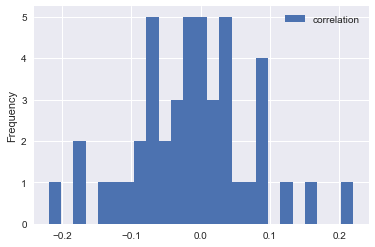

In [34]:
df.sort_values('correlation').plot(kind='hist',bins=25)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_clean_axis',
 '_get_palette',
 '_legend_out',
 '_margin_titles',
 '_preprocess_colors',
 '_update_legend_data',
 'add_legend',
 'ax_col_colors',
 'ax_col_dendrogram',
 'ax_heatmap',
 'ax_row_colors',
 'ax_row_dendrogram',
 'cax',
 'col_color_labels',
 'col_colors',
 'color_list_to_matrix_and_cmap',
 'data',
 'data2d',
 'dendrogram_col',
 'dendrogram_row',
 'dim_ratios',
 'fig',
 'format_data',
 'gs',
 'mask',
 'plot',
 'plot_colors',
 'plot_dendrograms',
 'plot_matrix',
 'row_color_labels',
 'row_colors',
 'savefig',
 'set',
 'standard_scale',
 'z_score']

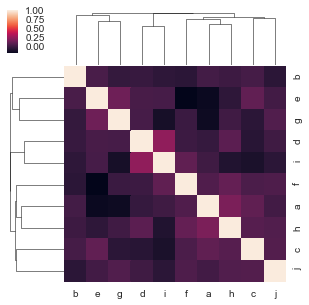

In [58]:
cluster = sns.clustermap(corrMatrix, figsize=(5,5))
dir(cluster)

[[ 3.          8.          1.13585559  2.        ]
 [ 0.          7.          1.2091723   2.        ]
 [ 4.          6.          1.27644324  2.        ]
 [ 5.         11.          1.3451567   3.        ]
 [ 2.          9.          1.36826554  2.        ]
 [13.         14.          1.39660835  5.        ]
 [ 1.         12.          1.46614913  3.        ]
 [10.         15.          1.51957077  7.        ]
 [16.         17.          1.53223469 10.        ]]
[[ 3.          8.          1.13585559  2.        ]
 [ 0.          7.          1.2091723   2.        ]
 [ 4.          6.          1.27644324  2.        ]
 [ 5.         11.          1.3451567   3.        ]
 [ 2.          9.          1.36826554  2.        ]
 [13.         14.          1.39660835  5.        ]
 [ 1.         12.          1.46614913  3.        ]
 [10.         15.          1.51957077  7.        ]
 [16.         17.          1.53223469 10.        ]]


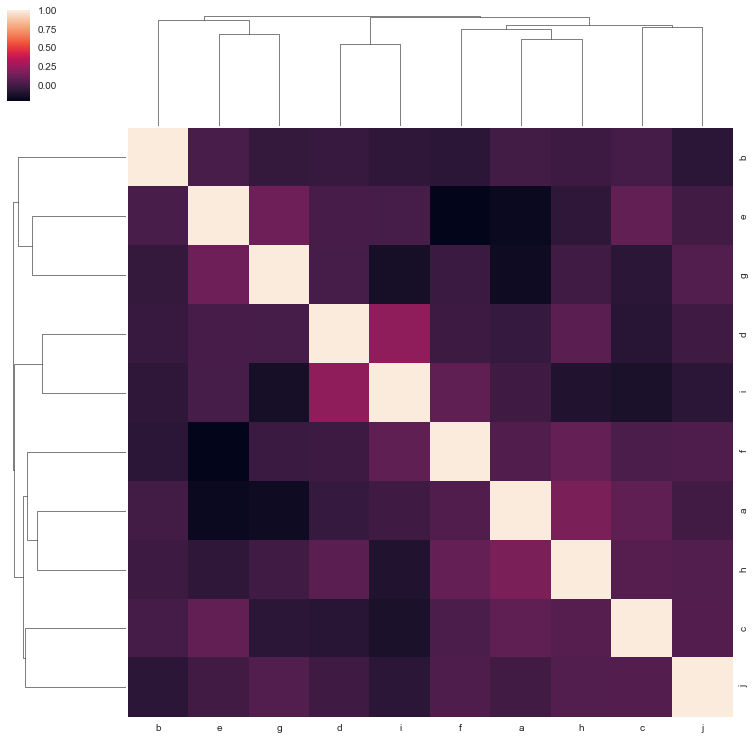

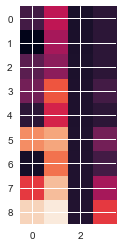

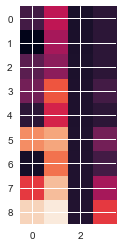

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_clean_axis',
 '_get_palette',
 '_legend_out',
 '_margin_titles',
 '_preprocess_colors',
 '_update_legend_data',
 'add_legend',
 'ax_col_colors',
 'ax_col_dendrogram',
 'ax_heatmap',
 'ax_row_colors',
 'ax_row_dendrogram',
 'cax',
 'col_color_labels',
 'col_colors',
 'color_list_to_matrix_and_cmap',
 'data',
 'data2d',
 'dendrogram_col',
 'dendrogram_row',
 'dim_ratios',
 'fig',
 'format_data',
 'gs',
 'mask',
 'plot',
 'plot_colors',
 'plot_dendrograms',
 'plot_matrix',
 'row_color_labels',
 'row_colors',
 'savefig',
 'set',
 'standard_scale',
 'z_score']

In [86]:
from scipy.spatial import distance
from scipy.cluster import hierarchy


correlations_array = np.asarray(corrMatrix)

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

print row_linkage
print col_linkage

cluster = sns.clustermap(corrMatrix, row_linkage=row_linkage, col_linkage=col_linkage, method="average", 
               figsize=(13, 13))

plt.show()

plt.imshow(row_linkage)
plt.show()

plt.imshow(col_linkage)
plt.show()

dir(cluster)